In [1]:
from connattractor import analysis
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
connfile = '../data_in/connectome_partial_correlation.csv'

mtx = pd.read_csv(connfile)
mtx = mtx.drop("Unnamed: 0", axis='columns')
mtx = mtx.drop("GlobSig", axis="columns")
mtx = mtx.drop(0, axis="index")


simresults = analysis.simulate_activations(mtx.values, noise_coef=1, num_iter=10000, beta=0.06)
# set noise_coef so that the PC-plot is symmetric to the center, but still nicely separates attractors

100%|██████████| 10000/10000 [09:11<00:00, 18.13it/s]


In [3]:
simresults.save('../data_in/ex_simulation.pckl')

In [4]:
simresults = analysis.load_simulation('../data_in/ex_simulation.pckl')

<Axes: >

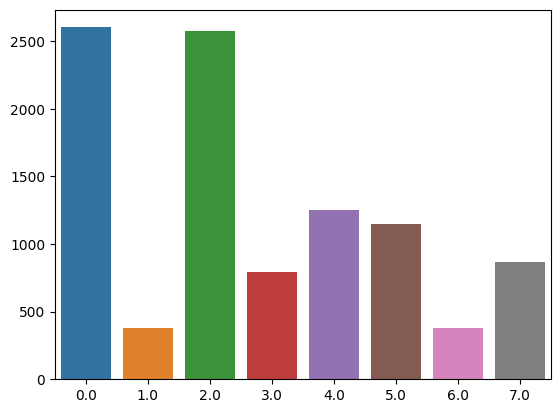

In [5]:
labels, counts = np.unique(simresults.attractors, return_counts=True)
sns.barplot(x=labels, y=counts)

In [6]:
from sklearn.neighbors import KernelDensity
hopfiled_embedding = analysis.create_embeddings(simresults)
hopfiled_embedding.save('../data_in/ex_embedding.pckl')

In [7]:
hopfiled_embedding = analysis.load_embedding('../data_in/ex_embedding.pckl')

<PolarAxes: >

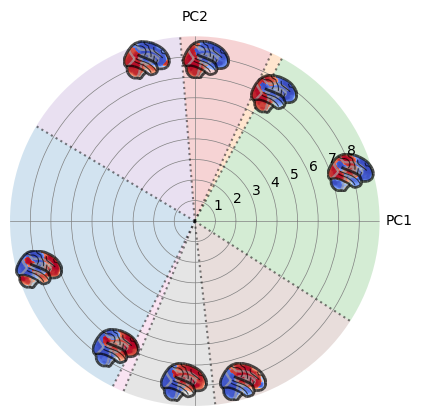

In [8]:
# empty plot
hopfiled_embedding.plot()

<PolarAxes: >

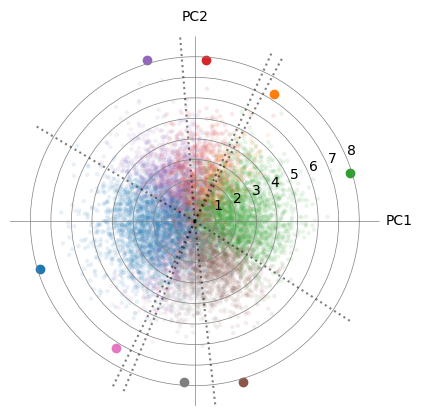

In [12]:
# let's plot the simulated states
import matplotlib.pyplot as plt
colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])
hopfiled_embedding.plot(simresults.states, 
                        c=colors[simresults.attractors.astype(int)], 
                        alpha=0.1, regimes_fill_kwargs=dict(alpha=0),
                        attractor_type='scatter')


<PolarAxes: >

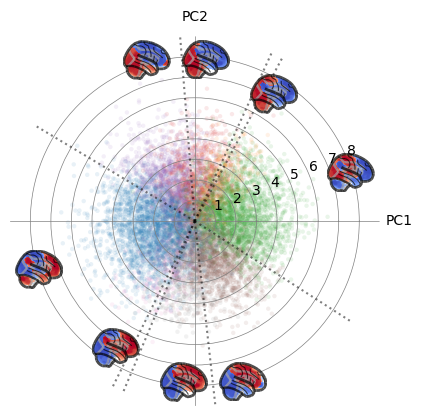

In [10]:
# let's plot the simulated states
import matplotlib.pyplot as plt
colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])
hopfiled_embedding.plot(simresults.states, 
                        c=colors[simresults.attractors.astype(int)], 
                        alpha=0.1, regimes_fill_kwargs=dict(alpha=0),
                        attractor_type='surface')


<PolarAxes: >

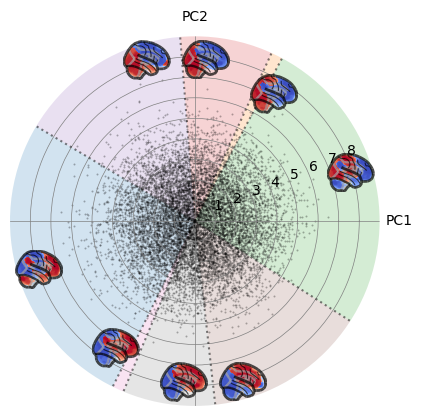

In [11]:
hopfiled_embedding.plot(simresults.states, color='black', s=2, alpha=0.3)